In [393]:
import pandas as pd

blue_O1 = pd.read_csv("color_logs\\signal_blue\\signal\\O1.csv")
blue_O2 = pd.read_csv("color_logs\\signal_blue\\signal\\O2.csv")

red_O1 = pd.read_csv("color_logs\\signal_red\\signal\\O1.csv")
red_O2 = pd.read_csv("color_logs\\signal_red\\signal\\O2.csv")

green_O1 = pd.read_csv("color_logs\\signal_green\\signal\\O1.csv")
green_O2 = pd.read_csv("color_logs\\signal_green\\signal\\O2.csv")


blue_O1.drop(columns=["timestamp"], inplace=True)
blue_O2.drop(columns=["timestamp"], inplace=True)


red_O1.drop(columns=["timestamp"], inplace=True)
red_O2.drop(columns=["timestamp"], inplace=True)


green_O1.drop(columns=["timestamp"], inplace=True)
green_O2.drop(columns=["timestamp"], inplace=True)


C:\Users\er321\AppData\Local\Temp\ipykernel_26188\446333233.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Blue O1', 'Blue O2', 'Red O1', 'Red O2', 'Green O1', 'Green O2'])


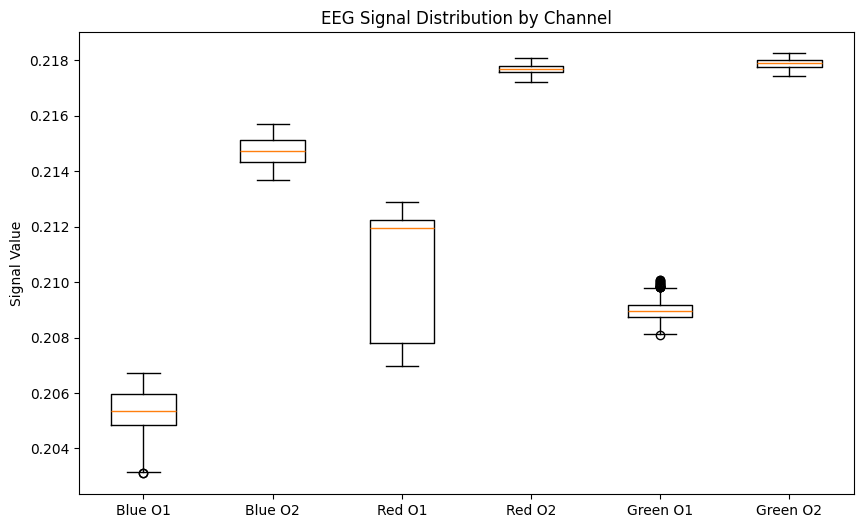

In [394]:
# display boxplots for all channels
import matplotlib.pyplot as plt
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Create boxplots for all channels
data = [blue_O1['value'], blue_O2['value'],
        red_O1['value'], red_O2['value'], 
        green_O1['value'], green_O2['value']]
plt.boxplot(data, labels=['Blue O1', 'Blue O2', 'Red O1', 'Red O2', 'Green O1', 'Green O2'])

# Customize the plot
plt.title('EEG Signal Distribution by Channel')
plt.ylabel('Signal Value')

# Display the plot
plt.show()


In [395]:
# remove outliers using MAD (Median Absolute Deviation)
def remove_outliers_mad(df, threshold=3):
    median = df['value'].median()
    mad = (df['value'] - median).abs().median() * 1.4826
    modified_zscore = (df['value'] - median).abs() / mad
    return df[modified_zscore < threshold]

blue_O1 = remove_outliers_mad(blue_O1)
blue_O2 = remove_outliers_mad(blue_O2)

red_O1 = remove_outliers_mad(red_O1)
red_O2 = remove_outliers_mad(red_O2)

green_O1 = remove_outliers_mad(green_O1)
green_O2 = remove_outliers_mad(green_O2)

C:\Users\er321\AppData\Local\Temp\ipykernel_26188\446333233.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Blue O1', 'Blue O2', 'Red O1', 'Red O2', 'Green O1', 'Green O2'])


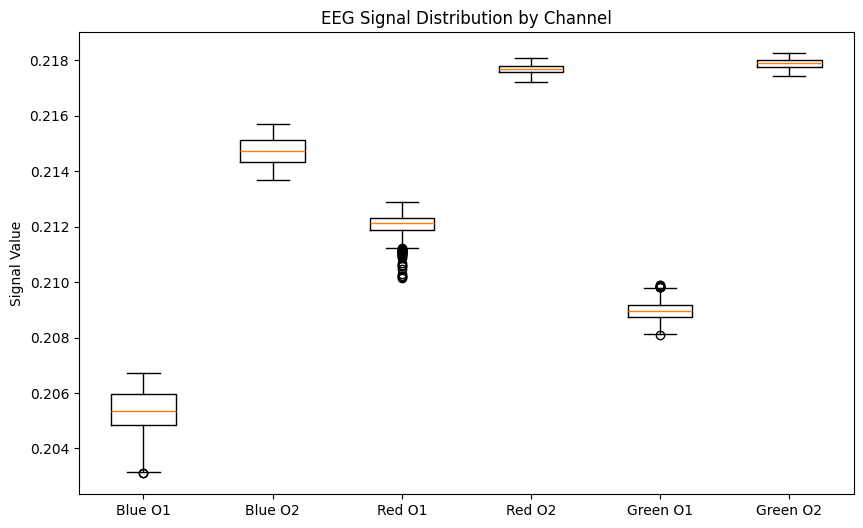

In [396]:
# display boxplots for all channels
import matplotlib.pyplot as plt
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Create boxplots for all channels
data = [blue_O1['value'], blue_O2['value'],
        red_O1['value'], red_O2['value'], 
        green_O1['value'], green_O2['value']]
plt.boxplot(data, labels=['Blue O1', 'Blue O2', 'Red O1', 'Red O2', 'Green O1', 'Green O2'])

# Customize the plot
plt.title('EEG Signal Distribution by Channel')
plt.ylabel('Signal Value')

# Display the plot
plt.show()


In [397]:
# add labels
# Align the lengths of blue_O1 and blue_O2 and create a new DataFrame with columns "O1" and "O2"
min_len = min(len(blue_O1), len(blue_O2))
blue_df = pd.DataFrame({
    "O1": blue_O1["value"].iloc[:min_len].reset_index(drop=True),
    "O2": blue_O2["value"].iloc[:min_len].reset_index(drop=True)
})

min_len = min(len(red_O1), len(red_O2))
red_df = pd.DataFrame({
    "O1": red_O1["value"].iloc[:min_len].reset_index(drop=True),
    "O2": red_O2["value"].iloc[:min_len].reset_index(drop=True)
})

min_len = min(len(green_O1), len(green_O2))
green_df = pd.DataFrame({
    "O1": green_O1["value"].iloc[:min_len].reset_index(drop=True),
    "O2": green_O2["value"].iloc[:min_len].reset_index(drop=True)
})

blue_df['label'] = 'blue'
red_df['label'] = 'red'
green_df['label'] = 'green'

df = pd.concat([blue_df, red_df, green_df])

print(df.head())


         O1        O2 label
0  0.203716  0.213912  blue
1  0.203450  0.213767  blue
2  0.203843  0.214079  blue
3  0.203903  0.214130  blue
4  0.203611  0.213880  blue


In [398]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [399]:
x = df[["O1", "O2"]]
y = df["label"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = LogisticRegression(class_weight="balanced")
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [400]:
print(x_test.head())

            O1        O2
1378  0.212465  0.217834
154   0.209000  0.217744
1217  0.211592  0.217606
1755  0.205859  0.215048
465   0.205007  0.214298


In [401]:
predictions = model.predict(x_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        blue       1.00      1.00      1.00       483
       green       1.00      0.44      0.61       509
         red       0.56      1.00      0.72       367

    accuracy                           0.79      1359
   macro avg       0.85      0.81      0.78      1359
weighted avg       0.88      0.79      0.78      1359



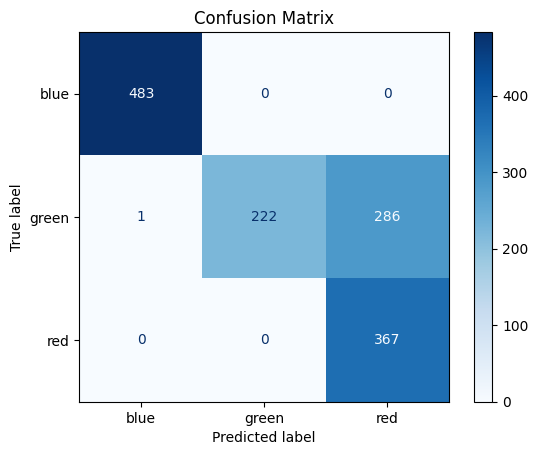

In [402]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix using the true labels and predictions
cm = confusion_matrix(y_test, predictions, labels=model.classes_)

# Create a confusion matrix display and plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from joblib import load

import pandas as pd

# Load the best model saved from the grid search
best_model = load('best_model.joblib')

mystery_O1 = pd.read_csv("color_logs\\signal_green\\signal\\O1.csv")
mystery_O2 = pd.read_csv("color_logs\\signal_green\\signal\\O2.csv")

example_df = pd.DataFrame({
    "O1": mystery_O1["value"],
    "O2": mystery_O2["value"]
})

# Extract the features (ensure the CSV has columns "O1" and "O2")
X_example = example_df[['O1', 'O2']]

# Use the loaded model to predict labels for the example data
predictions = best_model.predict(X_example)

# Attach the predictions to the DataFrame and display the count of predicted labels
example_df['Predicted Label'] = predictions
print("Count of predicted labels:")
print(example_df['Predicted Label'].value_counts())



Count of predicted labels:
Predicted Label
blue    2500
Name: count, dtype: int64
